In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline

UsageError: Line magic function `%` not found.


# Data Loading

In [2]:
# Load the file
df = pd.read_csv ("https://raw.githubusercontent.com/rogerloh-acc/Fun-Projects/main/Demo/Brazil%20Environment/environment_brazil.csv")
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Brazil,BRA,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.3410903622098
2,Brazil,BRA,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.3410663137971
3,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.2549706035075
4,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.1687313206048


# Data Cleaning

In [3]:
# Drop the First Row
df.drop (index = 0, inplace = True)
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Brazil,BRA,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.3410903622098
2,Brazil,BRA,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.3410663137971
3,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.2549706035075
4,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.1687313206048
5,Brazil,BRA,2014,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.0824920377022


In [4]:
# Number of rows - dataset 
len(df)

3555

In [6]:
# Check for missing values
df.isna().sum()

Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555 entries, 1 to 3555
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    3555 non-null   object
 1   Country ISO3    3555 non-null   object
 2   Year            3555 non-null   object
 3   Indicator Name  3555 non-null   object
 4   Indicator Code  3555 non-null   object
 5   Value           3555 non-null   object
dtypes: object(6)
memory usage: 194.4+ KB


In [9]:
# Both "Year" and "Value" are numerical. -> change to float
df ["Year"] = df["Year"].astype ("int64")
df ["Value"] = df["Value"].astype ("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3555 entries, 1 to 3555
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3555 non-null   object 
 1   Country ISO3    3555 non-null   object 
 2   Year            3555 non-null   int64  
 3   Indicator Name  3555 non-null   object 
 4   Indicator Code  3555 non-null   object 
 5   Value           3555 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 194.4+ KB


In [10]:
# Unique value in "Indicator Name"
df["Indicator Name"].unique()

array(['Agricultural land (% of land area)',
       'Arable land (% of land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Urban land area where elevation is below 5 meters (sq. km)',
       'Urban land area where elevation is below 5 meters (% of total land area)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Forest area (sq. km)', 'Forest area (% of land area)',
       'Average precipitation in depth (mm per year)',
       'Land area (sq. km)', 'Rural land area (sq. km)',
       'Urban land area (sq. km)', 'Surface area (sq. km)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
       'Access to electricity (% of population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'CO2 intensity (k

# Data Visualisation

In [12]:
# Select dataset with 'Agricultural land (% of land area)' only
agri_land = df [df ["Indicator Name"] == 'Agricultural land (% of land area)']
agri_land.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Brazil,BRA,2018,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.341090
2,Brazil,BRA,2017,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.341066
3,Brazil,BRA,2016,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.254971
4,Brazil,BRA,2015,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.168731
5,Brazil,BRA,2014,Agricultural land (% of land area),AG.LND.AGRI.ZS,28.082492


Text(0.5, 1.0, 'Agricultural land cover trend in Brazil')

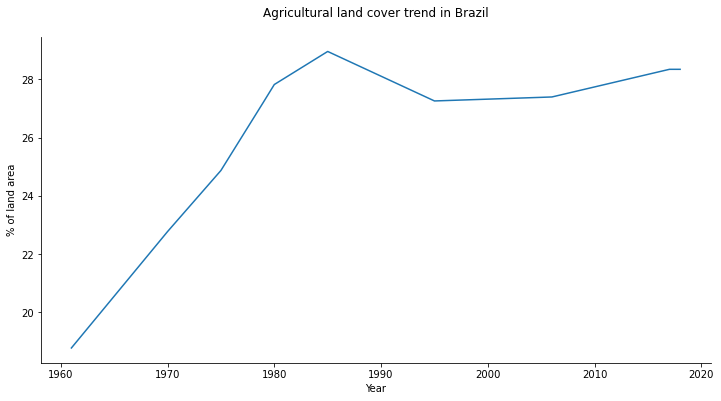

In [20]:
# Define the figure size (length, height)
fig, ax = plt.subplots (figsize = (12, 6))

# Specify x and y axis 
lineplot = sns.lineplot (x = agri_land ["Year"], y = agri_land ["Value"], data = agri_land) 

# Remove chart border
sns.despine()

# Specify the y-axis label
plt.ylabel ("% of land area")

# Specify the title 
plt.title ("Agricultural land cover trend in Brazil", pad = 20)


Text(0.5, 1.0, 'Forest land trend in Brazil')

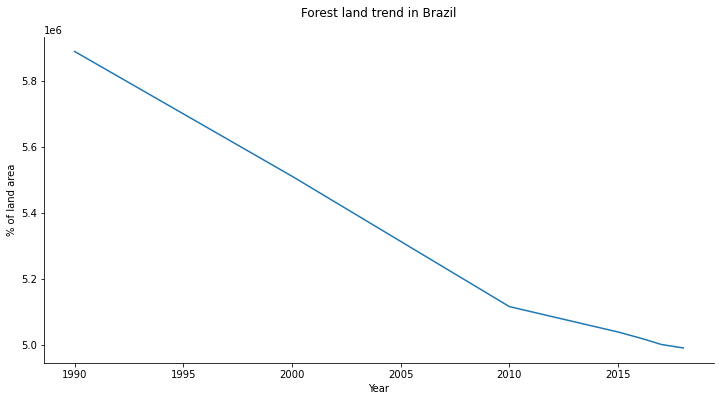

In [29]:
# Line chart for 'forest area (sq.km)

# Select the dataset
forest_land = df [ df[ "Indicator Name"] == "Forest area (sq. km)"]
# Reset the index number for this dataset
forest_land.reset_index (inplace = True)

# Visualisation
fig, ax = plt.subplots (figsize = (12,6))
lineplot = sns.lineplot (x = forest_land ["Year"], y = forest_land ["Value"], data = forest_land) 
sns.despine()
plt.ylabel ("% of land area")
plt.title ("Forest land trend in Brazil", pad = 20)

# Combine Variables in a Chart

In [37]:
# Combined chart function

def quick_line_plot (df1, title, y_label1, df2 = None, y_label2 = None):
    """
    df1: Dataframe 1 
    y_label1: Y axis label for the plot of dataframe 1
    df2: Dataframe 2 (optional)
    y_label2: Y axis label for the plot of dataframe 2 (optional) 
    """
    
    df1 = df1.sort_values (by = "Year")
    year_list = df1.Year.unique()
    year_max = year_list [-1]
    year_min = year_list [0]
    x_tick_list = list (range (year_min, year_max, 2))
    Label1 = df1 ["Indicator Name"][1]
    
    fig, ax = plt.subplots (figsize = (12, 6)) 
    lineplot = sns.lineplot (x = df1 ["Year"], y = df1 ["Value"], 
                             data = df1, label = Label1, legend = False)
    lineplot.set (xlim = (year_min -1, year_max +1))
    plt.xticks (x_tick_list, rotation = 45) # rotate the x-axis labels
    sns.despine()
    plt.ylabel (y_label1)
    plt.title (title, pad = 20)
    
    if df2 is not None:
        ax2 = ax.twinx()
        Label2 = df2 ["Indicator Name"][1]
        lineplot2 = sns.lineplot (x = df2 ["Year"], y = df2 ["Value"],
                                  ax = ax2, color = "r", label = Label2, legend = False)
        sns.despine (right = False)
        plt.ylabel (y_label2)
    ax.figure.legend()

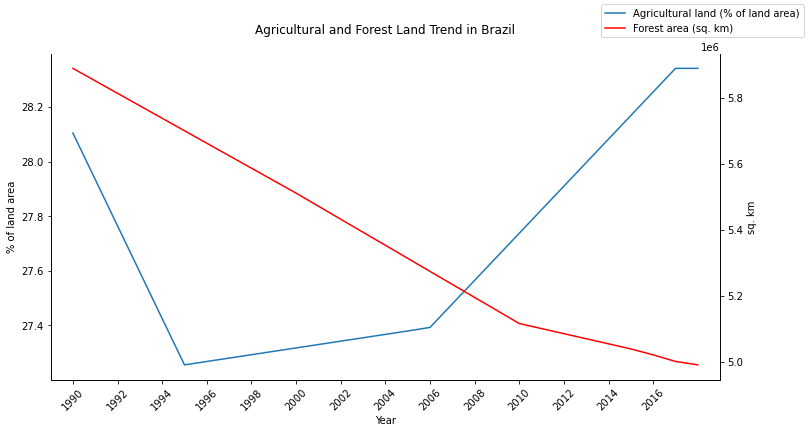

In [38]:
quick_line_plot (agri_land [agri_land.Year >= 1990], "Agricultural and Forest Land Trend in Brazil",
                 "% of land area", forest_land, "sq. km")